In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/agricuture-crops-production-in-india/datafile (2).csv
/kaggle/input/agricuture-crops-production-in-india/datafile.csv
/kaggle/input/agricuture-crops-production-in-india/produce.csv
/kaggle/input/agricuture-crops-production-in-india/datafile (3).csv
/kaggle/input/agricuture-crops-production-in-india/datafile (1).csv


# 1) Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

# 2) Importing Dataset

In [3]:
df=pd.read_csv("/kaggle/input/agricuture-crops-production-in-india/datafile (1).csv")
df.head()

,Crop,State,Cost of Cultivation (`/Hectare) A2+FL,Cost of Cultivation (`/Hectare) C2,Cost of Production (`/Quintal) C2,Yield (Quintal/ Hectare)
0,ARHAR,Uttar Pradesh,9794.05,23076.74,1941.55,9.83
1,ARHAR,Karnataka,10593.15,16528.68,2172.46,7.47
2,ARHAR,Gujarat,13468.82,19551.90,1898.30,9.59
3,ARHAR,Andhra Pradesh,17051.66,24171.65,3670.54,6.42
4,ARHAR,Maharashtra,17130.55,25270.26,2775.80,8.72


In [4]:
df1=pd.read_csv("/kaggle/input/agricuture-crops-production-in-india/datafile (2).csv")
df1.head()

,Crop,Production 2006-07,Production 2007-08,Production 2008-09,Production 2009-10,Production 2010-11,Area 2006-07,Area 2007-08,Area 2008-09,Area 2009-10,Area 2010-11,Yield 2006-07,Yield 2007-08,Yield 2008-09,Yield 2009-10,Yield 2010-11
0,Total Foodgrains,158.8,168.6,171.3,159.4,178.9,128.5,128.8,127.6,126.0,131.7,123.6,130.9,134.3,126.5,135.9
1,Rice,200.8,207.9,213.3,191.6,206.4,168.5,168.9,175.1,161.2,164.8,119.2,123.1,121.8,118.9,125.2
2,Wheat,131.6,136.4,140.1,140.3,150.8,115.0,115.2,114.0,116.9,119.5,114.4,118.4,122.8,120.0,126.3
3,Jowar,124.3,137.8,126.0,116.5,121.8,120.7,110.6,107.3,111.0,105.2,103.0,124.6,117.4,105.0,115.8
4,Bajra,136.4,161.5,143.9,105.4,167.9,94.5,95.1,87.0,88.5,95.6,144.3,169.7,165.4,119.0,175.8


In [5]:
df2=pd.read_csv("/kaggle/input/agricuture-crops-production-in-india/datafile (3).csv")
df2.head()

,Crop,Variety,Season/ duration in days,Recommended Zone,Unnamed: 4
0,Paddy,Chinsurah Rice (IET 19140),Medium,"Andhra Pradesh, Tamil Nadu, Gujarat, Orissa, a...",NaN
1,Paddy,(CNI 383-5-11),NaN,NaN,NaN
2,Paddy,IGKVR-1 (IET 19569),Mid-early,"Chhattisgarh, Madhya Pradesh and Orissa under ...",NaN
3,Paddy,IGKVR-2 (IET 19795),Medium,"Chhattisgarh, Bihar and Orissa under both irr...",NaN
4,Paddy,CR Dhan 401 (REETA),145-150,"Orissa, West Bengal, Tamil Nadu and Andhra Pra...",NaN


In [6]:
df3=pd.read_csv("/kaggle/input/agricuture-crops-production-in-india/datafile.csv")
df3.head()

,Crop,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12
0,Rice,100.0,101.0,99.0,105.0,112.0,121.0,117.0,110.0
1,Wheat,100.0,101.0,112.0,115.0,117.0,127.0,120.0,108.0
2,Coarse Cereals,100.0,107.0,110.0,115.0,113.0,123.0,122.0,136.0
3,Pulses,100.0,108.0,134.0,124.0,124.0,146.0,137.0,129.0
4,Vegetables,100.0,109.0,103.0,118.0,113.0,124.0,128.0,115.0


# 3) **Data Cleaning**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 6 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Crop                                   49 non-null     object 
 1   State                                  49 non-null     object 
 2   Cost of Cultivation (`/Hectare) A2+FL  49 non-null     float64
 3   Cost of Cultivation (`/Hectare) C2     49 non-null     float64
 4   Cost of Production (`/Quintal) C2      49 non-null     float64
 5   Yield (Quintal/ Hectare)               49 non-null     float64
dtypes: float64(4), object(2)
memory usage: 2.4+ KB


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Crop                55 non-null     object 
 1   Production 2006-07  55 non-null     float64
 2   Production 2007-08  55 non-null     float64
 3   Production 2008-09  55 non-null     float64
 4   Production 2009-10  55 non-null     float64
 5   Production 2010-11  55 non-null     float64
 6   Area 2006-07        55 non-null     float64
 7   Area 2007-08        55 non-null     float64
 8   Area 2008-09        55 non-null     float64
 9   Area 2009-10        55 non-null     float64
 10  Area 2010-11        55 non-null     float64
 11  Yield 2006-07       55 non-null     float64
 12  Yield 2007-08       55 non-null     float64
 13  Yield 2008-09       55 non-null     float64
 14  Yield 2009-10       55 non-null     float64
 15  Yield 2010-11       55 non-null     float64
dtypes: float64

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Crop                      78 non-null     object 
 1   Variety                   78 non-null     object 
 2   Season/ duration in days  50 non-null     object 
 3   Recommended Zone          77 non-null     object 
 4   Unnamed: 4                0 non-null      float64
dtypes: float64(1), object(4)
memory usage: 3.2+ KB


In [10]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Crop     12 non-null     object 
 1   2004-05  12 non-null     float64
 2   2005-06  12 non-null     float64
 3   2006-07  12 non-null     float64
 4   2007-08  12 non-null     float64
 5   2008-09  12 non-null     float64
 6   2009-10  12 non-null     float64
 7   2010-11  12 non-null     float64
 8   2011-12  12 non-null     float64
dtypes: float64(8), object(1)
memory usage: 1.0+ KB


# 1) Finding shape of the data set (Number of Rows and Columns)

In [11]:
df.shape

(49, 6)

In [12]:
df1.shape

(55, 16)

In [13]:
df2.shape

(78, 5)

In [14]:
df3.shape

(13, 9)

# 2) Finding of Null Values

In [15]:
df.isnull().sum()

Crop                                     0
State                                    0
Cost of Cultivation (`/Hectare) A2+FL    0
Cost of Cultivation (`/Hectare) C2       0
Cost of Production (`/Quintal) C2        0
Yield (Quintal/ Hectare)                 0
dtype: int64

In [16]:
df1.isnull().sum()

Crop                  0
Production 2006-07    0
Production 2007-08    0
Production 2008-09    0
Production 2009-10    0
Production 2010-11    0
Area 2006-07          0
Area 2007-08          0
Area 2008-09          0
Area 2009-10          0
Area 2010-11          0
Yield 2006-07         0
Yield 2007-08         0
Yield 2008-09         0
Yield 2009-10         0
Yield 2010-11         0
dtype: int64

**No Null value present**

In [17]:
df2.isnull().sum()

Crop                         0
Variety                      0
Season/ duration in days    28
Recommended Zone             1
Unnamed: 4                  78
dtype: int64

**Null value is present**

In [18]:
df3.isnull().sum()

Crop       1
2004-05    1
2005-06    1
2006-07    1
2007-08    1
2008-09    1
2009-10    1
2010-11    1
2011-12    1
dtype: int64

**Null value is Present in all Columns**

1. **Treatment of null values**

In [19]:
# Droping column from df2
df2.isnull().sum()


Crop                         0
Variety                      0
Season/ duration in days    28
Recommended Zone             1
Unnamed: 4                  78
dtype: int64

In [20]:
df2= df2.drop(columns="Unnamed: 4")

In [21]:
df2=df2.dropna()
df2.isna().sum()

Crop                        0
Variety                     0
Season/ duration in days    0
Recommended Zone            0
dtype: int64

In [22]:
# Treat null from df3
df3.isnull().sum()

Crop       1
2004-05    1
2005-06    1
2006-07    1
2007-08    1
2008-09    1
2009-10    1
2010-11    1
2011-12    1
dtype: int64

In [23]:
#fillna in df3
mean=df3["2004-05"].mean(skipna=True)
df3["2004-05"]=df3["2004-05"].fillna(mean)

In [24]:
mean=df3["2005-06"].mean(skipna=True)
df3["2005-06"]=df3["2005-06"].fillna(mean)

In [25]:
mean=df3["2006-07"].mean(skipna=True)
df3["2006-07"]=df3["2006-07"].fillna(mean)

In [26]:
mean=df3["2007-08"].mean(skipna=True)
df3["2007-08"]=df3["2007-08"].fillna(mean)

In [27]:
mean=df3["2008-09"].mean(skipna=True)
df3["2008-09"]=df3["2008-09"].fillna(mean)

In [28]:
mean=df3["2009-10"].mean(skipna=True)
df3["2009-10"]=df3["2009-10"].fillna(mean)

In [29]:
mean=df3["2010-11"].mean(skipna=True)
df3["2010-11"]=df3["2010-11"].fillna(mean)

In [30]:
mean=df3["2011-12"].mean(skipna=True)
df3["2011-12"]=df3["2011-12"].fillna(mean)

In [31]:
df3.dropna(subset=["Crop"], axis=0, inplace = True)

In [32]:
df3.isnull().sum()

Crop       0
2004-05    0
2005-06    0
2006-07    0
2007-08    0
2008-09    0
2009-10    0
2010-11    0
2011-12    0
dtype: int64

In [33]:
df3

,Crop,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12
0,Rice,100.0,101.0,99.0,105.0,112.0,121.0,117.0,110.0
1,Wheat,100.0,101.0,112.0,115.0,117.0,127.0,120.0,108.0
2,Coarse Cereals,100.0,107.0,110.0,115.0,113.0,123.0,122.0,136.0
3,Pulses,100.0,108.0,134.0,124.0,124.0,146.0,137.0,129.0
4,Vegetables,100.0,109.0,103.0,118.0,113.0,124.0,128.0,115.0
5,Fruits,100.0,99.0,99.0,98.0,102.0,104.0,114.0,119.0
6,Milk,100.0,97.0,98.0,98.0,98.0,112.0,123.0,124.0
7,"Eggs, Fish and Meat",100.0,102.0,101.0,100.0,99.0,116.0,133.0,137.0
8,Oilseeds,100.0,86.0,85.0,97.0,104.0,103.0,99.0,102.0
9,Sugarcane,100.0,96.0,91.0,87.0,80.0,81.0,109.0,107.0


# 3) Treat the error in column names in df1:-

In column name same spaces are present so we have to treat it because it create problem to fetch columns


In [34]:
df1.columns

Index(['Crop             ', 'Production 2006-07', 'Production 2007-08',
       'Production 2008-09', 'Production 2009-10', 'Production 2010-11',
       'Area 2006-07', 'Area 2007-08', 'Area 2008-09', 'Area 2009-10',
       'Area 2010-11', 'Yield 2006-07', 'Yield 2007-08', 'Yield 2008-09',
       'Yield 2009-10', 'Yield 2010-11'],
      dtype='object')

In [35]:
df1=pd.read_csv("/kaggle/input/agricuture-crops-production-in-india/datafile (2).csv",header=None)
df1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,Crop,Production 2006-07,Production 2007-08,Production 2008-09,Production 2009-10,Production 2010-11,Area 2006-07,Area 2007-08,Area 2008-09,Area 2009-10,Area 2010-11,Yield 2006-07,Yield 2007-08,Yield 2008-09,Yield 2009-10,Yield 2010-11
1,Total Foodgrains,158.8,168.6,171.3,159.4,178.9,128.5,128.8,127.6,126.0,131.7,123.6,130.9,134.3,126.5,135.9
2,Rice,200.8,207.9,213.3,191.6,206.4,168.5,168.9,175.1,161.2,164.8,119.2,123.1,121.8,118.9,125.2
3,Wheat,131.6,136.4,140.1,140.3,150.8,115.0,115.2,114.0,116.9,119.5,114.4,118.4,122.8,120.0,126.3
4,Jowar,124.3,137.8,126.0,116.5,121.8,120.7,110.6,107.3,111.0,105.2,103.0,124.6,117.4,105.0,115.8


In [36]:
df1.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], dtype='int64')

In [37]:
col_names=["Crop","Production 2006-07","Production 2007-08","Production 2008-09","Production 2009-10","Production 2010-11","Area 2006-07","Area 2007-08","Area 2008-09","Area 2009-10","Area 2010-11","Yield 2006-07","Yield 2007-08","Yield 2008-09","Yield 2009-10","Yield 2010-11"]

In [38]:
df1=pd.read_csv("/kaggle/input/agricuture-crops-production-in-india/datafile (2).csv",skiprows=1,names=col_names)
df1.head()

,Crop,Production 2006-07,Production 2007-08,Production 2008-09,Production 2009-10,Production 2010-11,Area 2006-07,Area 2007-08,Area 2008-09,Area 2009-10,Area 2010-11,Yield 2006-07,Yield 2007-08,Yield 2008-09,Yield 2009-10,Yield 2010-11
0,Total Foodgrains,158.8,168.6,171.3,159.4,178.9,128.5,128.8,127.6,126.0,131.7,123.6,130.9,134.3,126.5,135.9
1,Rice,200.8,207.9,213.3,191.6,206.4,168.5,168.9,175.1,161.2,164.8,119.2,123.1,121.8,118.9,125.2
2,Wheat,131.6,136.4,140.1,140.3,150.8,115.0,115.2,114.0,116.9,119.5,114.4,118.4,122.8,120.0,126.3
3,Jowar,124.3,137.8,126.0,116.5,121.8,120.7,110.6,107.3,111.0,105.2,103.0,124.6,117.4,105.0,115.8
4,Bajra,136.4,161.5,143.9,105.4,167.9,94.5,95.1,87.0,88.5,95.6,144.3,169.7,165.4,119.0,175.8


In [39]:
df1.head()

,Crop,Production 2006-07,Production 2007-08,Production 2008-09,Production 2009-10,Production 2010-11,Area 2006-07,Area 2007-08,Area 2008-09,Area 2009-10,Area 2010-11,Yield 2006-07,Yield 2007-08,Yield 2008-09,Yield 2009-10,Yield 2010-11
0,Total Foodgrains,158.8,168.6,171.3,159.4,178.9,128.5,128.8,127.6,126.0,131.7,123.6,130.9,134.3,126.5,135.9
1,Rice,200.8,207.9,213.3,191.6,206.4,168.5,168.9,175.1,161.2,164.8,119.2,123.1,121.8,118.9,125.2
2,Wheat,131.6,136.4,140.1,140.3,150.8,115.0,115.2,114.0,116.9,119.5,114.4,118.4,122.8,120.0,126.3
3,Jowar,124.3,137.8,126.0,116.5,121.8,120.7,110.6,107.3,111.0,105.2,103.0,124.6,117.4,105.0,115.8
4,Bajra,136.4,161.5,143.9,105.4,167.9,94.5,95.1,87.0,88.5,95.6,144.3,169.7,165.4,119.0,175.8


# EDA on Agriculture Crop Production In India

# 1)Checking total number of Crop 

In [40]:
count=df.Crop.value_counts()
count

ARHAR                   5
COTTON                  5
GRAM                    5
GROUNDNUT               5
MAIZE                   5
MOONG                   5
PADDY                   5
RAPESEED AND MUSTARD    5
SUGARCANE               5
WHEAT                   4
Name: Crop, dtype: int64

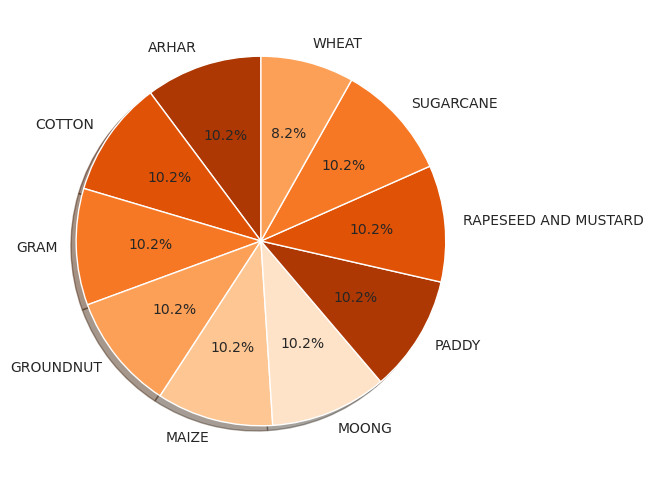

In [41]:
plt.figure(figsize=(12,6),)
sns.set_style("white")
color=sns.color_palette("Oranges_r")
plt.pie(count,labels=count.index,autopct="%0.1f%%",shadow=True,colors=color,startangle=90);

In [42]:
df.head()

,Crop,State,Cost of Cultivation (`/Hectare) A2+FL,Cost of Cultivation (`/Hectare) C2,Cost of Production (`/Quintal) C2,Yield (Quintal/ Hectare)
0,ARHAR,Uttar Pradesh,9794.05,23076.74,1941.55,9.83
1,ARHAR,Karnataka,10593.15,16528.68,2172.46,7.47
2,ARHAR,Gujarat,13468.82,19551.90,1898.30,9.59
3,ARHAR,Andhra Pradesh,17051.66,24171.65,3670.54,6.42
4,ARHAR,Maharashtra,17130.55,25270.26,2775.80,8.72


# 2) Checking Production and Cultivation Crop wise

In [43]:
cols = df.columns

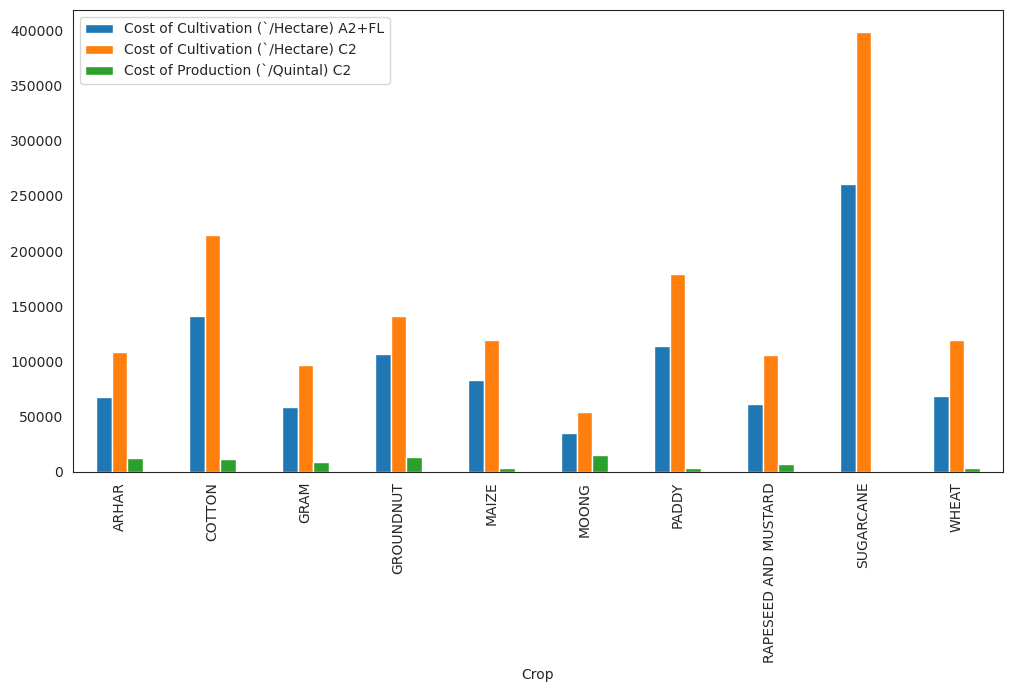

In [44]:
df.groupby('Crop')[cols[:-1]].sum().plot(kind='bar', figsize=(12,6));

# 3) Checking Production and Cultivation state wise

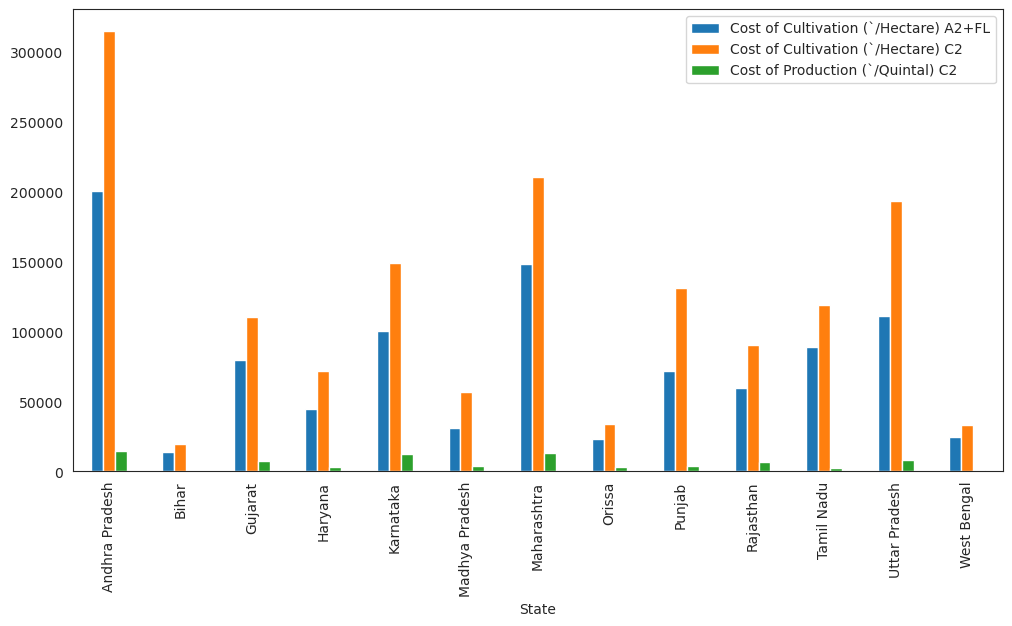

In [45]:
df.groupby('State')[cols[:-1]].sum().plot(kind='bar', figsize=(12,6));

# 4) State wise Yield

Text(0.5, 1.0, 'State-wise Yield (Quintal/ Hectare) ')

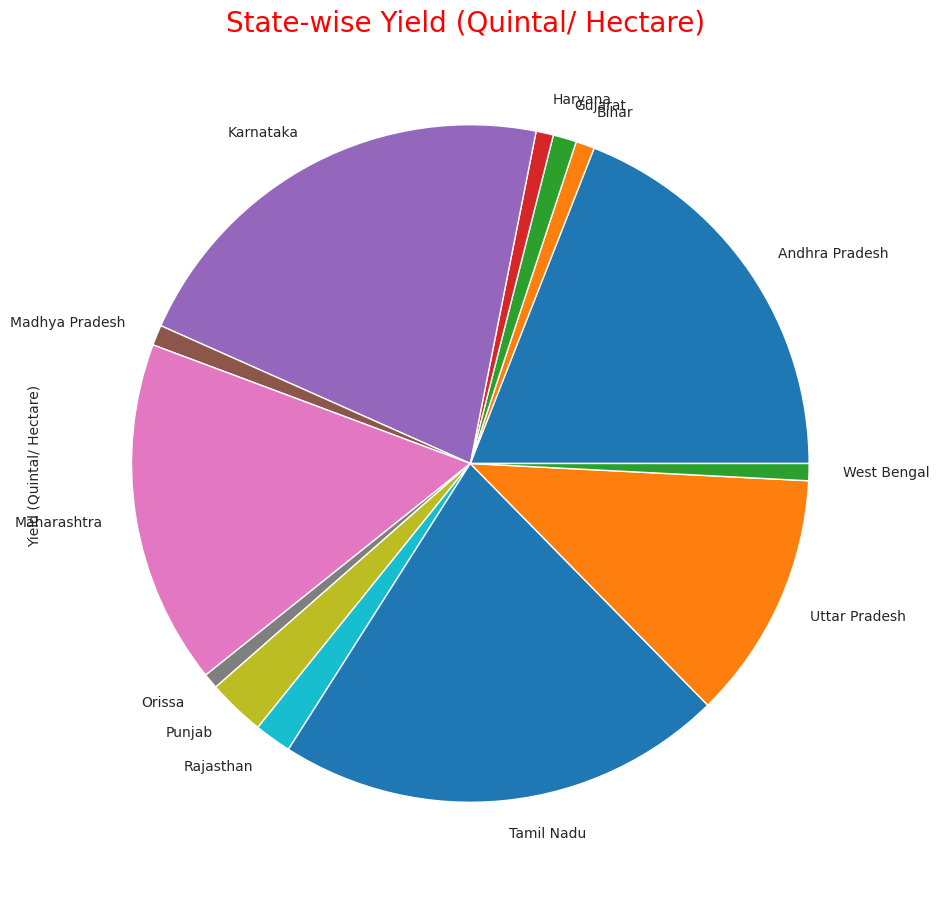

In [46]:
df.groupby('State')[cols[-1]].sum().plot(kind='pie', figsize=(11,11))
plt.title('State-wise '+cols[-1], color='red', fontsize=20)

# 5) Crop wise Yield

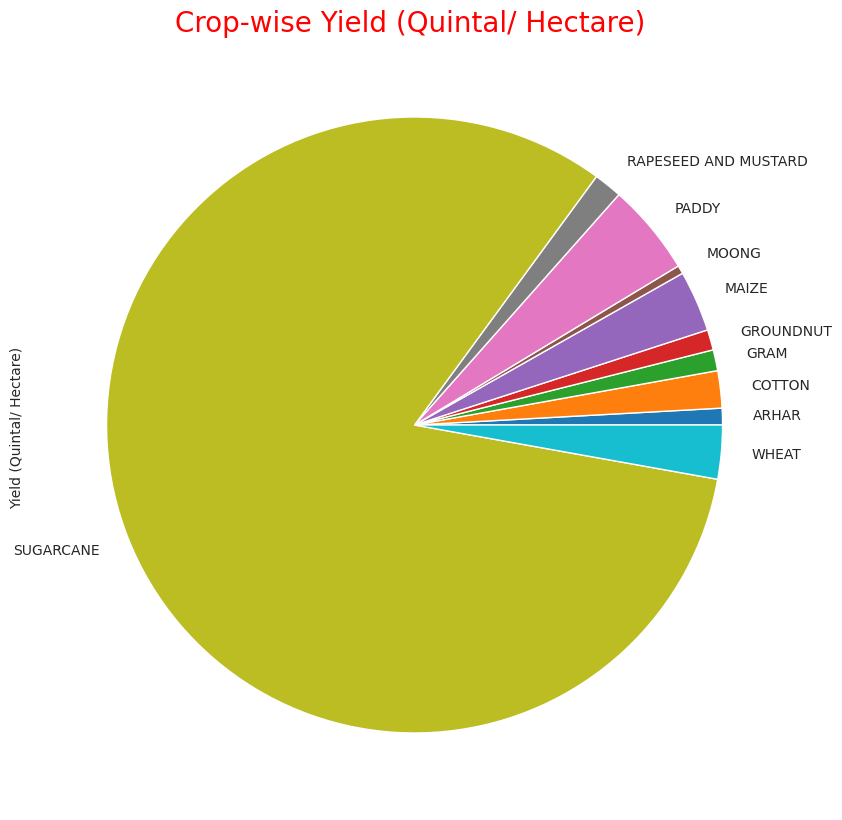

In [47]:
plt.title('Crop-wise '+cols[-1], color='red', fontsize=20)
df.groupby('Crop')[cols[-1]].sum().plot(kind='pie', figsize=(10,10));

# 6) Year wise production different agricultural products

In [48]:
cols1=df1[["Crop","Production 2006-07","Production 2007-08","Production 2008-09","Production 2009-10","Production 2010-11"]].groupby("Crop")
index = list(cols1.indices.keys())
index[-8:-2]

['Total Foodgrains',
 'Total Fruits & Vegetables',
 'Total Non-Food grains ',
 'Total Oilseeds',
 'Total Pulses',
 'Total Spices']

Text(0.5, 0, 'Products')

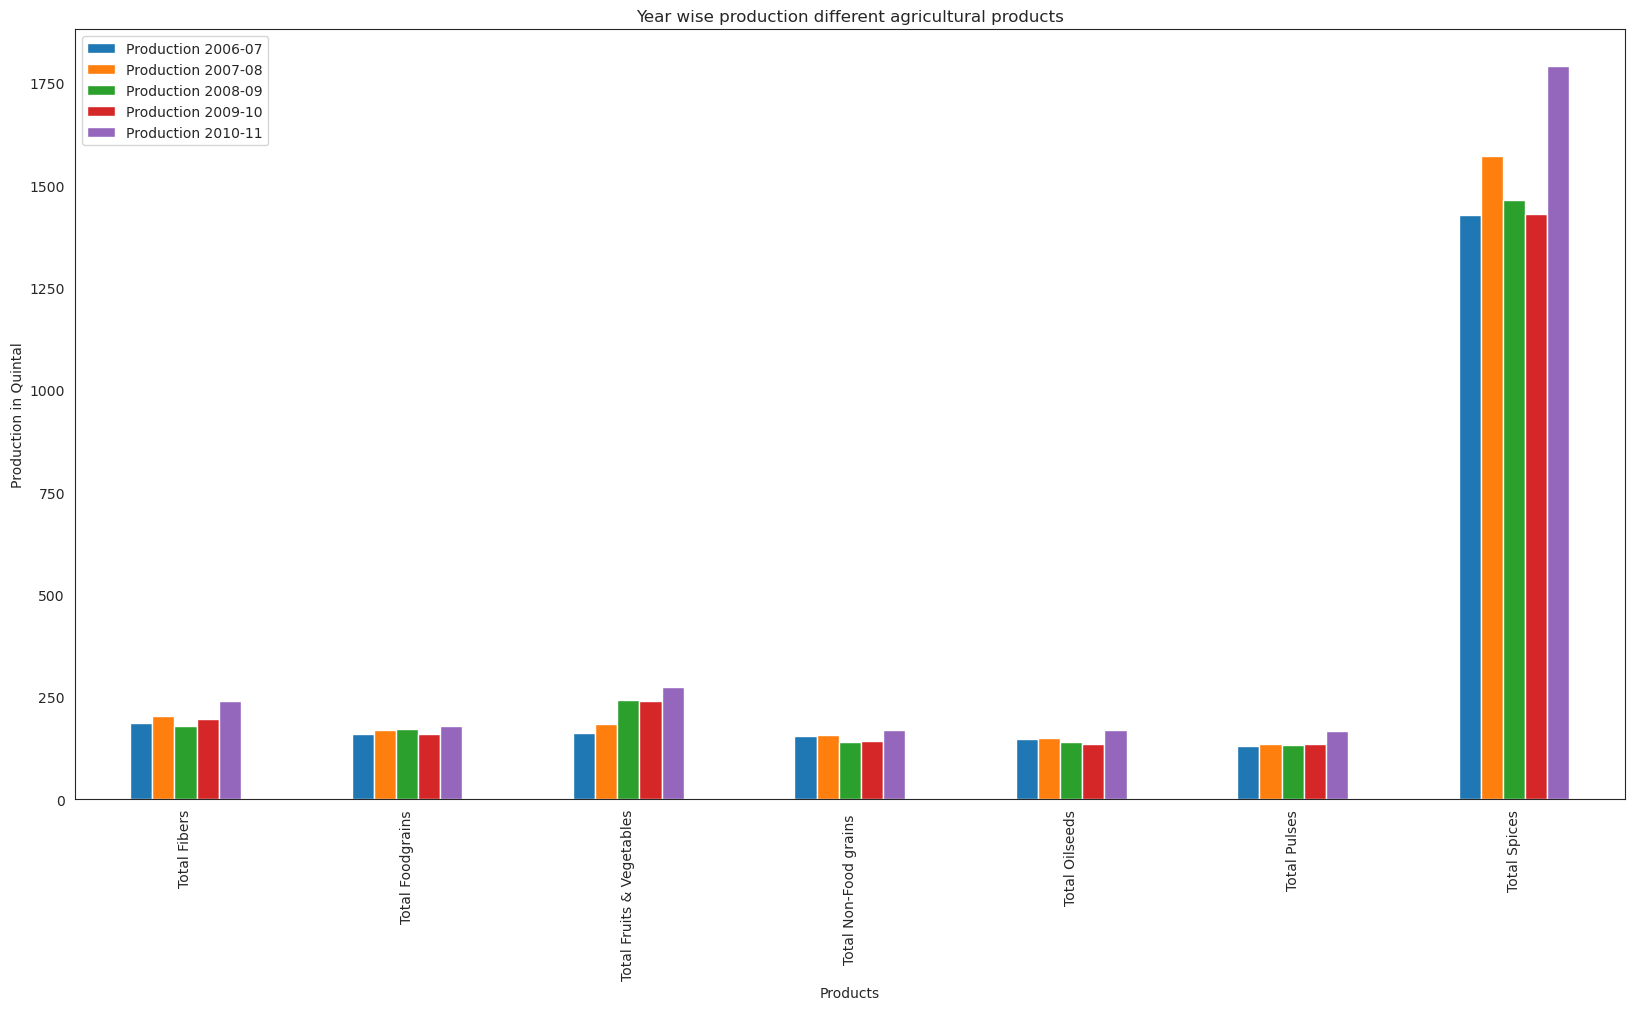

In [49]:
cols1.sum()[-9:-2].plot(figsize=(20,10), kind='bar');
plt.title('Year wise production different agricultural products')
plt.ylabel('Production in Quintal')
plt.xlabel('Products')

 # 7) Area wise different agricultural products

In [50]:
cols2=df1[["Crop","Area 2006-07","Area 2007-08","Area 2008-09","Area 2009-10","Area 2010-11"]].groupby("Crop")
index=list(cols2.indices.keys())
index[-8:-2]

['Total Foodgrains',
 'Total Fruits & Vegetables',
 'Total Non-Food grains ',
 'Total Oilseeds',
 'Total Pulses',
 'Total Spices']

Text(0.5, 0, 'Products')

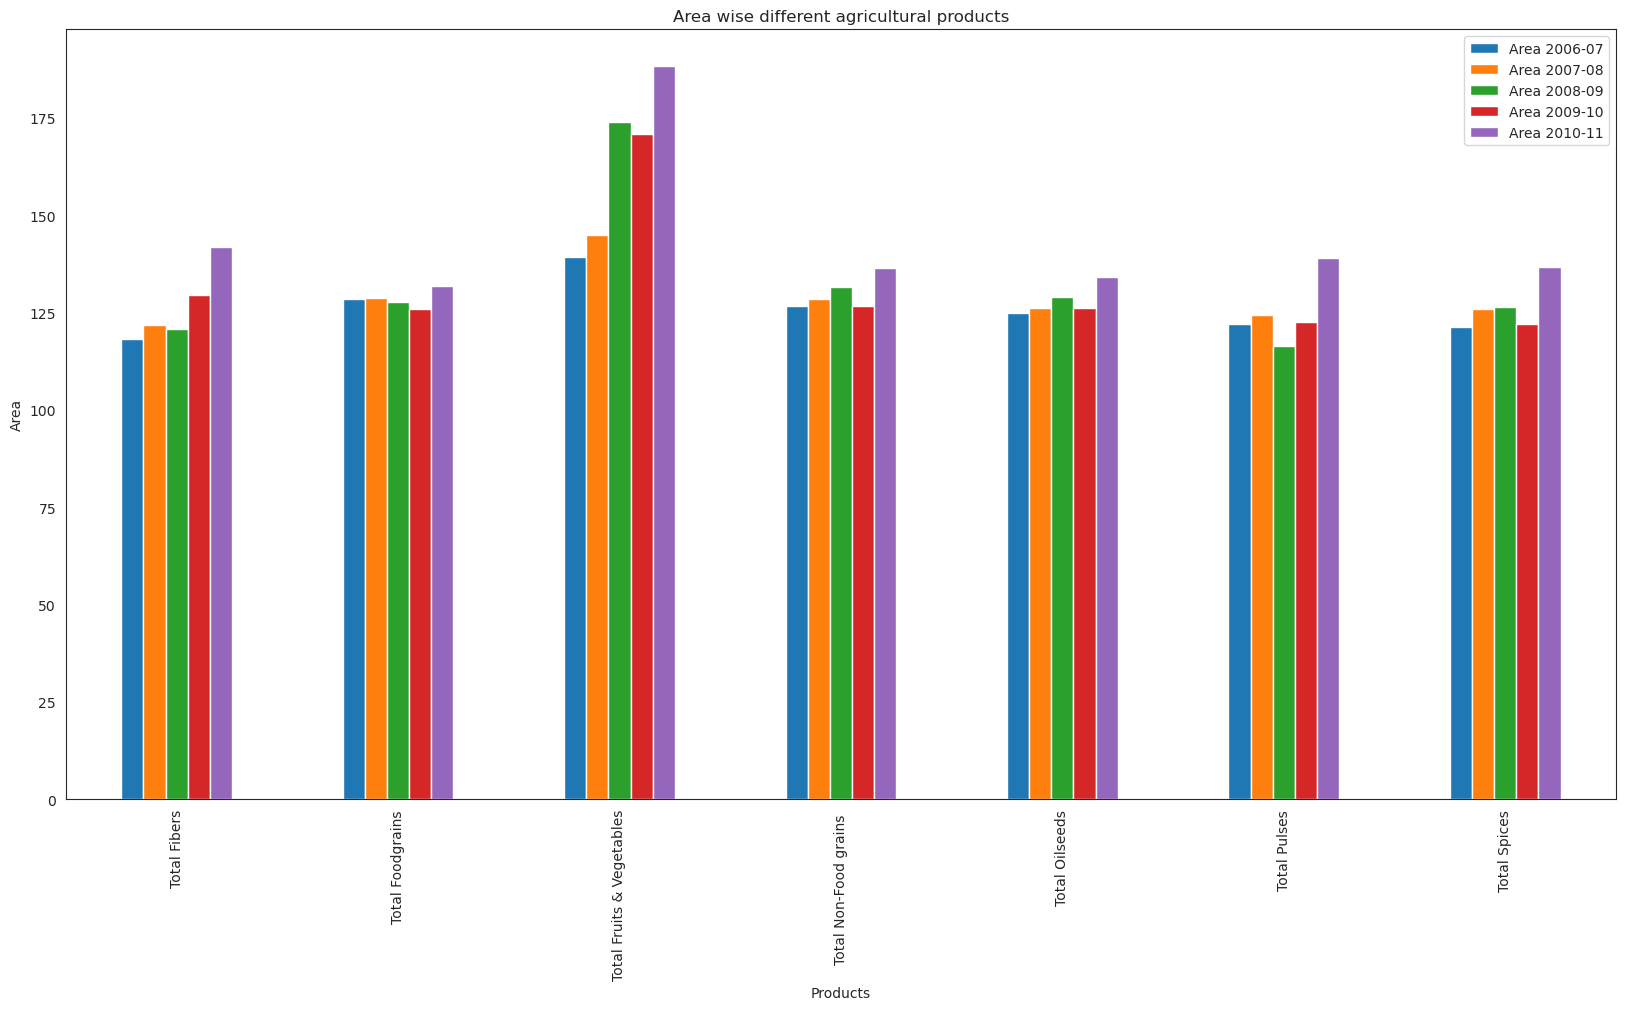

In [51]:
cols2.sum()[-9:-2].plot(kind="bar",figsize=(20,10))
plt.title("Area wise different agricultural products")
plt.ylabel('Area')
plt.xlabel('Products')

# 8) Year wise Yield of different agricultural products

In [52]:
cols3=df1[["Crop","Yield 2007-08","Yield 2008-09","Yield 2009-10","Yield 2010-11"]].groupby("Crop")
index=list(cols3.indices.keys())
index=[-8,-2]


Text(0.5, 0, 'Products')

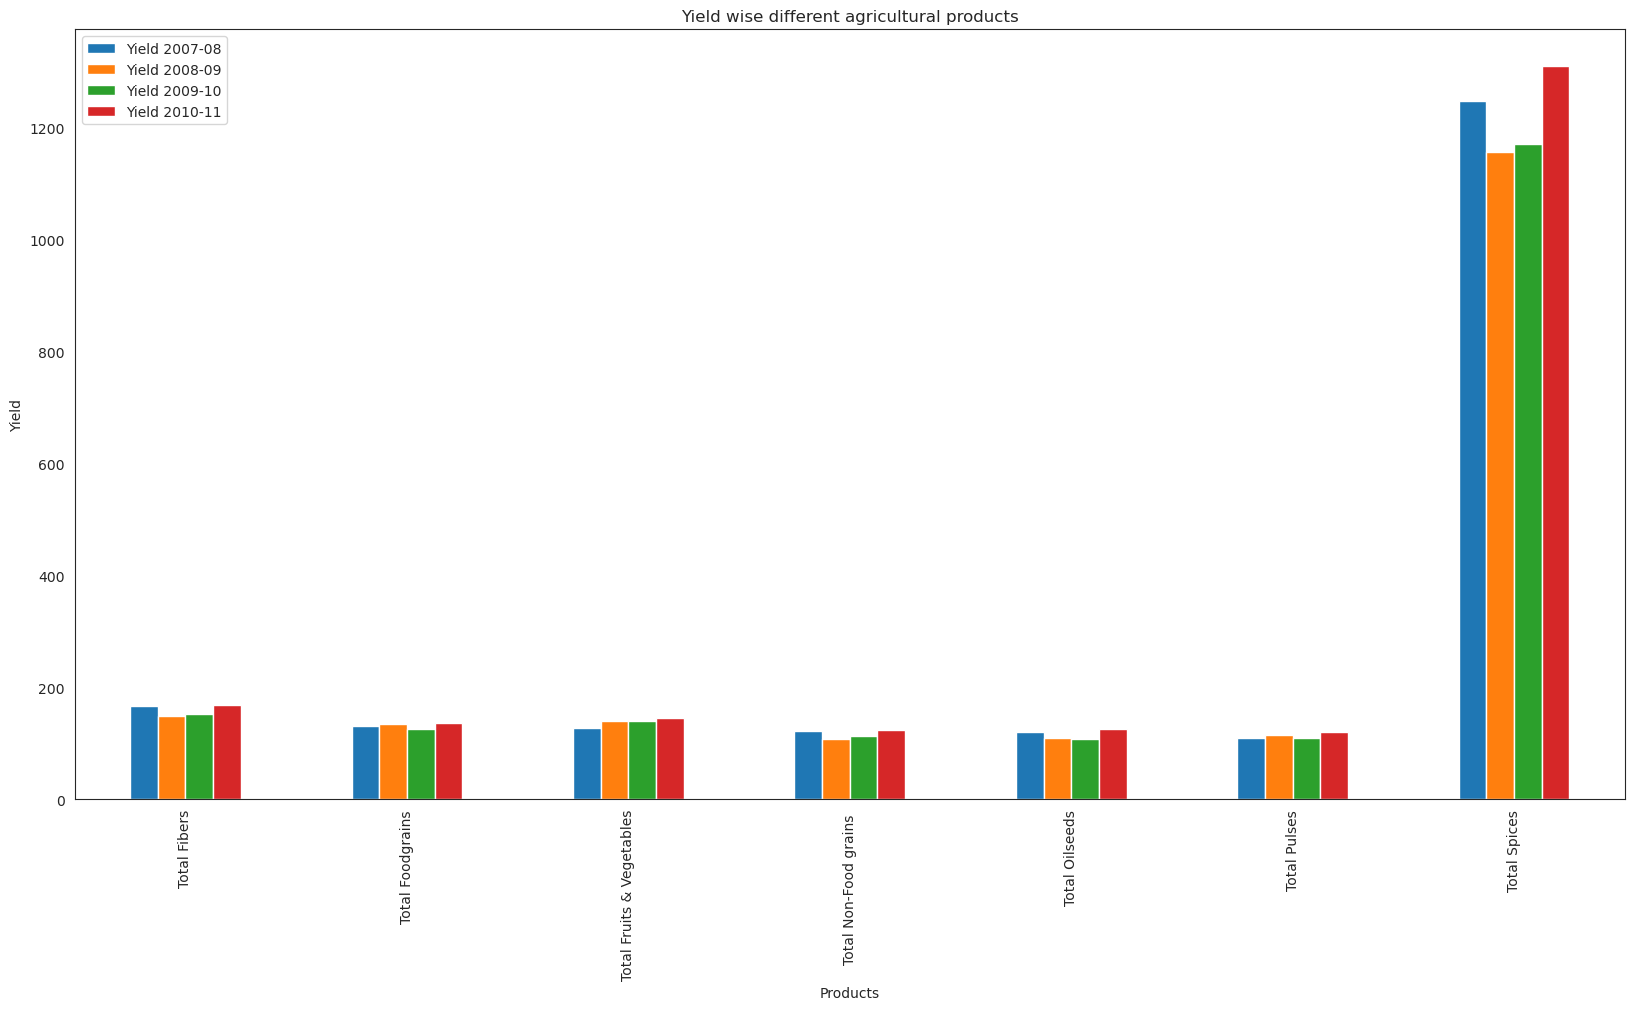

In [53]:
cols3.sum()[-9:-2].plot(kind="bar",figsize=(20,10))
plt.title("Yield wise different agricultural products")
plt.ylabel('Yield')
plt.xlabel('Products')

# END EDA